# Image Processing Lesson

__Eray Ates__

In [5]:
from image import *

In [6]:
# Settings
config.read('config.ini')

img_url = config['MAIN']['image']

folder_content = config['MAIN']['folder']
folder_out = config['MAIN']['out']

img_name = os.path.basename(img_url)
createFolders((folder_content, folder_out))
downloadImage(img_url, folder_content, img_name)

asset_org = "{}/{}".format(folder_content, img_name)
asset_out = "{}/{}".format(folder_out, img_name)

Open image

In [7]:
img = Image(filename=asset_org, format=os.path.splitext(img_name)[1][1:])

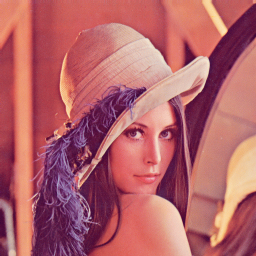

In [8]:
# display(img)
img

## HW1 Part

Transfer image pixels to array

In [9]:
array = img2array(img, color="BW")

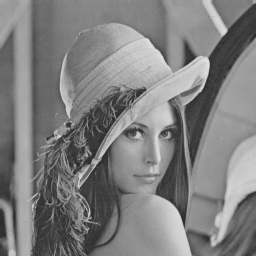

In [10]:
img_array = Image.from_array(array)
img_array

In [12]:
img_array.close()

## Histogram

In [13]:
import matplotlib.pyplot as plt
# plt.style.available

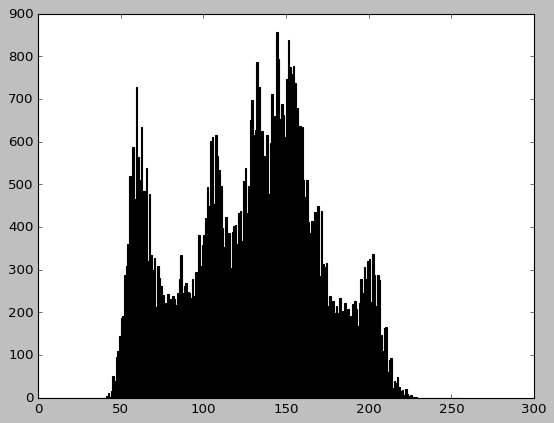

In [17]:
plt.style.use('classic')
plt.hist(array.ravel(), 256, [0,256], color='black')
plt.show()

## Find treshold

In [18]:
thresholdValue = int(np.mean(array.ravel()))

In [19]:
array_the = array.copy()

In [20]:
array_the[array_the >= thresholdValue] = 255
array_the[array_the < thresholdValue] = 0

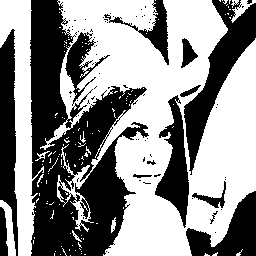

In [21]:
img_array_the = Image.from_array(array_the)
img_array_the

In [22]:
img_array_the.close()

## HW2 Part

In [23]:
array = img2array(img, color="RGB")

In [26]:
img_height, img_width = img.size

Generate zore mean gaussing noise

In [143]:
sigma = 10
mu = 0  # mean

# For RGB we have 3 color but we should edit R-G-B seperate, I will use same guassion value to add all colors
s = np.random.normal(mu, sigma, size=(img_height, img_width, 1)).astype(np.int8)

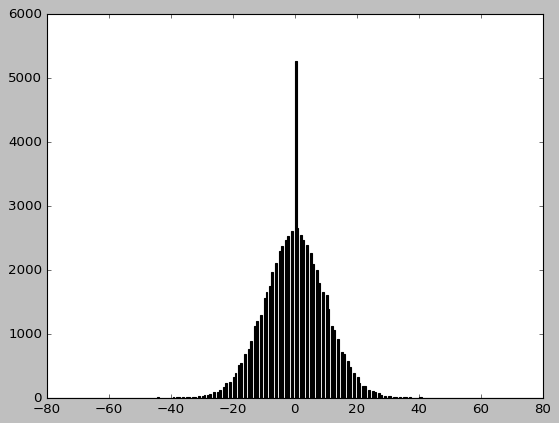

In [144]:
plt.style.use('classic')
plt.hist(s.ravel(), 256, [- 80, 80], color='black')
plt.show()

In [165]:
x = np.add(array, s, dtype=np.int16)

In [166]:
x[x > 255] = 255
x[x < 0] = 0

In [167]:
x = x.astype(np.uint8)

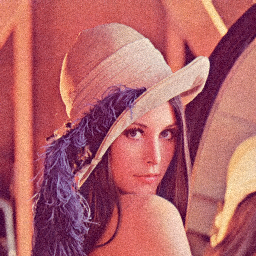

In [149]:
img_array_the = Image.from_array(x)
img_array_the

In [79]:
img_array_the.close()

Grey Scale

In [168]:
x = np.mean(x, axis=2, keepdims=1, dtype=np.uint16).astype(np.uint8)

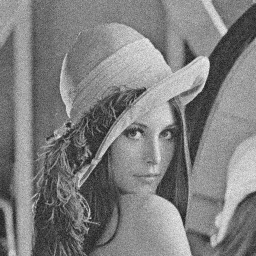

In [169]:
img_array_the = Image.from_array(x)
img_array_the